In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from forest_2 import *
from dqn import *

%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

config_map = {
            'rewards' : {'mushroom' : 20,
                    'carniv' : -100,
                    'tree' : 10,
                    'nothing' : -0.5,
                    'trap' : -5},
            'value' : {'agent' : 7,
                    'mushroom' : 29,
                    'carniv' : -99,
                    'tree' : 19,
                    'nothing' : 0.5,
                    'trap' : -4},
            'amount' : {'mushroom' : 2000,
                    'carniv' : 100,
                    'tree' : 1000,
                    'trap' : 200},
            'vision': 13,
            'mushroom_revive': 100,
            'carniv_th': 4,
            'carniv_giveup': 0.3
            }

features = config_map['vision']

env = Forest_2(map_size = [100, 100],
               map_para = config_map)
env.test()

SUCCESS!


No.1 episode!
No.2 episode!
0,cost:19650
No.3 episode!
5000,cost:47
No.4 episode!
No.5 episode!
No.6 episode!
No.7 episode!
No.8 episode!
No.9 episode!
No.10 episode!
No.11 episode!
10000,cost:21
No.12 episode!
No.13 episode!
No.14 episode!
No.15 episode!
No.16 episode!
No.17 episode!
No.18 episode!
15000,cost:110
No.19 episode!
No.20 episode!
No.21 episode!
No.22 episode!
No.23 episode!
No.24 episode!
No.25 episode!
No.26 episode!
No.27 episode!
20000,cost:0
No.28 episode!
25000,cost:24
No.29 episode!
No.30 episode!
No.31 episode!
No.32 episode!
No.33 episode!
No.34 episode!
No.35 episode!
No.36 episode!
30000,cost:3
No.37 episode!
No.38 episode!
35000,cost:21
40000,cost:347
45000,cost:9
No.39 episode!
No.40 episode!
50000,cost:16
No.41 episode!
No.42 episode!
No.43 episode!
No.44 episode!
No.45 episode!
55000,cost:10
No.46 episode!
60000,cost:308
No.47 episode!
No.48 episode!
No.49 episode!
No.50 episode!
No.51 episode!
No.52 episode!
65000,cost:11
No.53 episode!
No.54 episode!
No.55

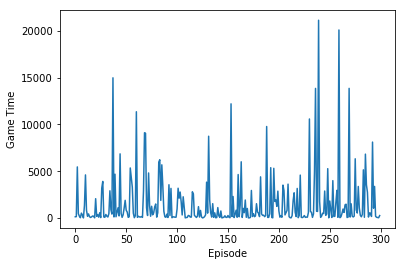

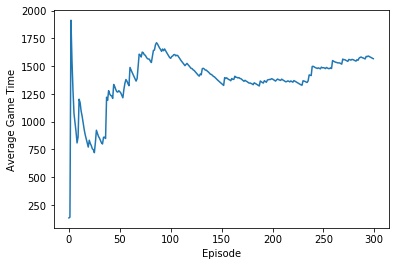

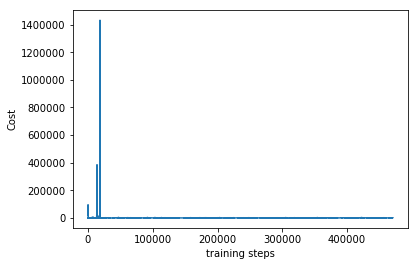

In [2]:
RL = DeepQNet(n_actions=5,
            n_features=features,
            learning_rate=0.01,
            reward_decay=0.9 ,
            e_greedy=0.1,
            replace_target_iter=200,
            memory_size=2000,
            useConvNet = True
            # output_graph=True
            )
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    train(env, RL, episode = 300, vision = config_map['vision'])
    saver.save(sess, 'model/{}'.format('c32@3-c32@3-d50-d50_vi13_epi300_Adam'))
    #env.mainloop()
    RL.plot_cost()

In [2]:
RLtest = DeepQNet(n_actions=5,
            n_features=features,
            learning_rate=0.01,
            reward_decay=0.9,
            e_greedy=0.1,
            replace_target_iter=200,
            memory_size=2000,
            useConvNet = True
            # output_graph=True
            )
with tf.Session() as sess:
    loader = tf.train.Saver()
    pos = env.init_env(refresh = False)
    observation = env.get_observation().flatten()
    total_rewards = 100
    loader.restore(sess, 'model/conv32@3-conv32@3-dense50-dense50_vision13_episode300')
    for i in range(100):
        env.print_observation()

        #action = RL.choose_action(observation)  
        observation = observation[np.newaxis, :]
        actions_value = RLtest.sess.run(RLtest.q_eval, feed_dict={RLtest.s: observation.reshape(1,RLtest.n_features,RLtest.n_features,1)})
        action = np.argmax(actions_value)

        reward = env.get_reward(action)
        total_rewards += reward
        observation_ = env.get_observation().flatten()
        #RLtest.store_transition(observation, action, reward, observation_)
        observation = observation_
        if (total_rewards<0):
            break

INFO:tensorflow:Restoring parameters from model/conv32@3-conv32@3-dense50-dense50_vision13_episode300
■ ■ X T T ■ ■ ■ ■ ■ ■ ■ ■ 
X ■ T ■ ■ ■ ■ ■ T ■ ■ T T 
■ ■ ■ X ■ ■ ■ ■ ■ ■ ■ T ■ 
■ ■ ■ ■ ■ ■ T ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ T T ■ ■ ■ ■ ■ ■ ■ 
■ ■ X ■ ■ ■ ■ ■ ■ T ■ ■ T 
■ ■ ■ C T T X ■ ■ ■ ■ ■ ■ 
■ X ■ ■ ■ ■ ■ ■ ■ ■ ■ T ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ T ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
X X X X X X X W X X X X X 
X X W X X X X X X X X X X 
X X X X X X X X X X X X X 

■ ■ ■ ■ C C ■ ■ ■ ■ ■ ■ ■ 
■ ■ X T T ■ ■ ■ ■ ■ ■ ■ ■ 
X ■ T ■ ■ ■ ■ ■ T ■ ■ T T 
■ ■ ■ X ■ ■ ■ ■ ■ ■ ■ T ■ 
■ ■ ■ ■ ■ ■ T ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ T T ■ ■ ■ ■ ■ ■ ■ 
■ ■ X ■ ■ ■ X ■ ■ T ■ ■ T 
■ ■ ■ C T T ■ ■ ■ ■ ■ ■ ■ 
■ W ■ ■ ■ ■ ■ ■ ■ ■ ■ T ■ 
■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ T ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
X X W X X X X X X X X X X 
X X X X X X X X X X X X X 

■ ■ ■ ■ ■ C C ■ ■ ■ ■ ■ ■ 
■ ■ ■ X T T C ■ ■ ■ ■ ■ ■ 
T X ■ T ■ ■ ■ ■ ■ T ■ ■ T 
■ ■ ■ ■ X ■ ■ ■ ■ ■ ■ ■ T 
T ■ ■ ■ ■ ■ ■ T ■ ■ ■ ■ ■ 
X ■ ■ ■ ■ T T ■ ■ ■ ■ ■ ■ 
■ ■ ■ X ■ ■ X ■ ■ ■ T ■ ■ 
■ ■ ■

■ ■ ■ ■ ■ T ■ ■ C T ■ ■ T 
T ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ T ■ C C C ■ C C ■ 
T ■ ■ T ■ ■ ■ ■ C ■ ■ C C 
■ ■ C ■ ■ ■ ■ ■ C T ■ ■ ■ 
■ ■ C C C C ■ ■ C T ■ ■ ■ 
■ ■ ■ T C C X C C X ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ T ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ X C T ■ T ■ ■ ■ ■ ■ 
■ ■ ■ C C ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ C ■ ■ ■ ■ ■ ■ T 
■ T ■ ■ ■ T ■ ■ T ■ ■ ■ T 

■ ■ ■ ■ ■ ■ ■ T C T ■ ■ ■ 
■ ■ ■ ■ ■ T ■ ■ C T ■ ■ T 
T ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ T ■ C C C ■ C C ■ 
T ■ ■ T ■ ■ ■ ■ C ■ ■ C C 
■ ■ C ■ ■ ■ ■ ■ C T ■ ■ ■ 
■ ■ C C C C X ■ C T ■ ■ ■ 
■ ■ ■ T C C ■ C C X ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ T ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ X C T ■ T ■ ■ ■ ■ ■ 
■ ■ ■ C C ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ ■ C ■ ■ ■ ■ ■ ■ T 

■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ T 
■ ■ ■ ■ ■ ■ ■ T C T ■ ■ ■ 
■ ■ ■ ■ ■ T ■ ■ C T ■ ■ T 
T ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ ■ 
■ ■ ■ ■ T ■ C C C ■ C C ■ 
T ■ ■ T ■ ■ ■ ■ C ■ ■ C C 
■ ■ C ■ ■ ■ X ■ C T ■ ■ ■ 
■ ■ C C C C ■ ■ C T ■ ■ ■ 
■ ■ ■ T C C ■ C C X ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ T ■ ■ ■ 
■ ■ ■ ■ C ■ ■ ■ ■ ■ ■ ■ ■ 

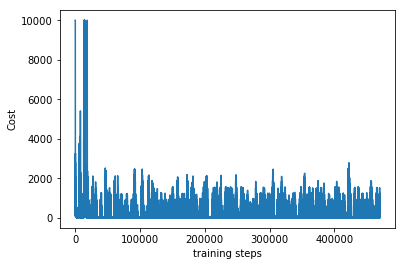

In [6]:
RL.plot_cost()